This project looks at the relationship whether we can effectively predict next year's energy production, consumption and expenditure based on data frmo the preceding four years, and looks at the relationship between those figures and GDP.

In [1]:
# Import the relevant libraries and the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\State energy use.csv")
data.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


We have a huge number of columns - for the moment, we just want to work with figures for total energy use, consumption and spend, as well as economic and geographic statistics

In [2]:
features = ["State", "TotalC2010", "TotalC2011", "TotalC2012", "TotalC2013", "TotalC2014", "TotalP2010", "TotalP2011", "TotalP2012", "TotalP2013", "TotalP2014", "TotalE2010", "TotalE2011", "TotalE2012", "TotalE2013", "TotalE2014", "TotalPrice2010", "TotalPrice2011", "TotalPrice2012", "TotalPrice2013", "TotalPrice2014", "GDP2010", "GDP2011", "GDP2012", "GDP2013", "GDP2014", "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014"]
data = data[features]
data.head()

,State,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,TotalP2010,TotalP2011,TotalP2012,TotalP2013,...,GDP2010,GDP2011,GDP2012,GDP2013,GDP2014,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,Alabama,1931522,1905207,1879716,1919365,1958221,1419613,1400108,1433370,1463647,...,176220.75,181923.00,187283.25,191605.25,197534.50,4785822,4801695,4817484,4833996,4849377
1,Alaska,653221,653637,649341,621107,603119,1738207,1641980,1563102,1513859,...,54220.00,59318.25,61613.50,59890.75,58066.75,713856,722572,731081,737259,736732
2,Arizona,1383531,1424944,1395839,1414383,1422590,580948,617956,598039,594994,...,247333.00,255620.50,266130.75,271072.50,281558.75,2922297,2938430,2949300,2958765,2966369
3,Arkansas,1120632,1122544,1067642,1096438,1114409,1247709,1391190,1472778,1432074,...,104928.75,109378.25,111541.00,116651.50,121064.75,6411999,6472867,6556236,6634997,6731484
4,California,7760629,7777115,7564063,7665241,7620082,2532205,2634789,2334863,2390424,...,1960935.00,2031347.75,2121602.25,2215231.50,2324995.50,37336011,37701901,38062780,38431393,38802500


In [3]:
# Explore the dataset to check for null values and see the type of data we have in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 31 columns):
State              52 non-null object
TotalC2010         52 non-null int64
TotalC2011         52 non-null int64
TotalC2012         52 non-null int64
TotalC2013         52 non-null int64
TotalC2014         52 non-null int64
TotalP2010         52 non-null int64
TotalP2011         52 non-null int64
TotalP2012         52 non-null int64
TotalP2013         52 non-null int64
TotalP2014         52 non-null int64
TotalE2010         52 non-null float64
TotalE2011         52 non-null float64
TotalE2012         52 non-null float64
TotalE2013         52 non-null float64
TotalE2014         52 non-null float64
TotalPrice2010     52 non-null float64
TotalPrice2011     52 non-null float64
TotalPrice2012     52 non-null float64
TotalPrice2013     52 non-null float64
TotalPrice2014     52 non-null float64
GDP2010            52 non-null float64
GDP2011            52 non-null float64
GDP2012            52

We have no null values, but have 52 values for states. Let's see why it is more than 50, and decide whether to keep the extra rows

In [4]:
print(data["State"])

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8                  Florida
9                  Georgia
10                  Hawaii
11                   Idaho
12                Illinois
13                 Indiana
14                    Iowa
15                  Kansas
16                Kentucky
17               Louisiana
18                   Maine
19                Maryland
20           Massachusetts
21                Michigan
22               Minnesota
23             Mississippi
24                Missouri
25                 Montana
26                Nebraska
27                  Nevada
28           New Hampshire
29              New Jersey
30              New Mexico
31                New York
32          North Carolina
33            North Dakota
34                    Ohio
35                Oklahoma
36                  Oregon
3

District of Columbia and United States are listed here separately - we only want the values for each state so we will delete these

In [5]:
data = data.drop([50,51], axis=0)
data.tail()

,State,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,TotalP2010,TotalP2011,TotalP2012,TotalP2013,...,GDP2010,GDP2011,GDP2012,GDP2013,GDP2014,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
45,Virginia,2483360,2380922,2343908,2414477,2430205,1096973,1085234,1045095,1023009,...,423505.75,431961.25,444527.50,451877.50,462243.00,8025376,8110188,8193422,8270345,8326289
46,Washington,2031428,2059630,2037127,2036309,2011941,907957,1101186,1108998,1003330,...,362113.50,372286.75,390153.25,402789.00,422766.50,6741911,6822112,6896325,6973742,7061530
47,West Virginia,738821,726341,720985,743612,752942,3699729,3820203,3720223,3809750,...,66961.00,70891.25,70914.75,72762.50,74432.75,1854176,1854982,1856313,1853595,1850326
48,Wisconsin,1791199,1778018,1721543,1813458,1868867,329441,312552,333635,310413,...,253801.00,263634.75,273879.75,281549.25,293341.25,5689268,5708785,5724888,5742953,5757564
49,Wyoming,540122,556548,550182,539146,535612,10536570,10353148,9611304,9233869,...,39093.25,41578.00,39909.00,40456.50,40875.50,564358,567631,576893,583223,584153


Let's see how accurately we can predict the following year's energy consumption, production and expenditure, and which of the three is the most predictable

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train = data[:40]
test = data[40:]
features = ["TotalC2010", "TotalC2011", "TotalC2012", "TotalC2013"]
target = ["TotalC2014"]
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
c_rmse = np.sqrt(mse)
print("Consumption error =", c_rmse)

Consumption error = 48888.83521888733


In [7]:
features = ["TotalE2010", "TotalE2011", "TotalE2012", "TotalE2013"]
target = ["TotalE2014"]
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
e_rmse = np.sqrt(mse)
print("Expenditure error =", e_rmse)

Expenditure error = 938.8090310398617


In [8]:
features = ["TotalP2010", "TotalP2011", "TotalP2012", "TotalP2013"]
target = ["TotalP2014"]
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
p_rmse = np.sqrt(mse)
print("Production error =", p_rmse)


Production error = 105830.5729575453


These values need some context, so we can give them as a percentage of the repsective values for 2014

In [9]:
c_error_scaled = (c_rmse/data["TotalC2014"].mean())*100
p_error_scaled = (p_rmse/data["TotalP2014"].mean())*100
e_error_scaled = (e_rmse/data["TotalE2014"].mean())*100
print("Consumption error percentage =", c_error_scaled, "\nProduction error percentage=", p_error_scaled, "\nExpenditure error percentage=", e_error_scaled)

Consumption error percentage = 2.4885427196041023 
Production error percentage= 6.393983889902881 
Expenditure error percentage= 3.3700334790287862


It looks like we can most accurately predict the next year's consumption, and least accurately predict production (this is twice as inaccurate)
Now we can see if using energy expenditure, consumption and production for 2010-2014 is an effective way of predicting what GDP will be the following year, i.e 2014

In [13]:
features = ["TotalC2010", "TotalC2011", "TotalC2012", "TotalC2013", "TotalE2010", "TotalE2011", "TotalE2012", "TotalE2013", "TotalP2010", "TotalP2011", "TotalP2012", "TotalP2013"]
target = ["GDP2014"]
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
error_scaled = (rmse/data["GDP2014"].mean())*100
print("Error % =", error_scaled)

Error % = 40.53812513111383


This is not particularly effective - is using the preceding years' GDP a better indicator?

In [14]:
features = ["GDP2010", "GDP2011", "GDP2012", "GDP2013"]
target = ["GDP2014"]
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
error_scaled = (rmse/data["GDP2014"].mean())*100
print("Error % =", error_scaled)

Error % = 1.7343532102817625


This is a much better predictor for the GDP that year. How about population estimates, particulary if we include 2014's figures?

In [15]:
features = ["POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014"]
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
error_scaled = (rmse/data["GDP2014"].mean())*100
print("Error % =", error_scaled)

Error % = 22.58163684875853


This is quite a significant error, over 20% out. Let's visualise some of the features to show correlation

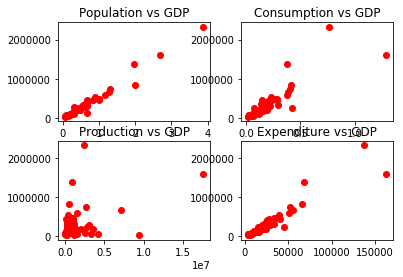

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.scatter(data["POPESTIMATE2014"], data["GDP2014"],color="red")
ax1.set_title("Population vs GDP")
ax2.scatter(data["TotalC2014"], data["GDP2014"],color="red")
ax2.set_title("Consumption vs GDP")
ax3.scatter(data["TotalP2014"], data["GDP2014"],color="red")
ax3.set_title("Production vs GDP")
ax4.scatter(data["TotalE2014"], data["GDP2014"],color="red")
ax4.set_title("Expenditure vs GDP")
plt.show()

Energy production is the least correlatied with GDP, which is to be expected, given that energy production will be based 
on inherent geographic features that can't be affected by small shifts in population. This might explain why combining
consumption, production and expenditure was not an accurate way to predict GDP
